In [78]:
import scanpy as sc
import scvi
import pandas as pd
import numpy as np
import anndata
import pyreadr
import umap
import umap.plot

/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [2]:
adni_fs = pyreadr.read_r("/home/fengling/Documents/nnbatch/data/raw/n839_thickness_demog.rds")
adni_fs = adni_fs[None]

In [46]:
adni_fs_sort = adni_fs[ [ col for col in adni_fs.columns if col != 'subject' ] + ['subject'] ]

In [47]:
adni_obs = adni_fs_sort.iloc[:, 20484:]

In [48]:
adni_obs["rid"] = adni_obs["rid"].astype("int").astype("category")

In [58]:
adni_obs

,rid,INDEX,Sex,Age,Diagnosis,date,id,tp1,ADNI_MEM,ADNI_EF,subject
0,295,002_S_0295,M,84.9,CN,2006-11-02,002,1.0,1.653,1.071,002_S_0295-2006-11-02_08_16_44.0-S21856
1,413,002_S_0413,F,76.4,CN,2006-05-02,002,1.0,1.577,1.619,002_S_0413-2006-05-02_12_31_52.0-S13893
2,559,002_S_0559,M,79.4,CN,2006-05-23,002,1.0,1.108,1.293,002_S_0559-2006-05-23_15_31_00.0-S14875
3,619,002_S_0619,M,77.6,AD,2006-06-01,002,1.0,-1.368,-1.357,002_S_0619-2006-06-01_20_04_45.0-S15145
4,685,002_S_0685,F,89.7,CN,2006-07-06,002,1.0,0.614,0.891,002_S_0685-2006-07-06_10_36_49.0-S16309
...,...,...,...,...,...,...,...,...,...,...,...
834,1197,941_S_1197,F,82.5,CN,2007-01-20,941,1.0,0.685,0.621,941_S_1197-2007-01-20_10_25_24.0-S25332
835,1202,941_S_1202,M,77.6,CN,2007-01-30,941,1.0,0.278,-0.006,941_S_1202-2007-01-30_09_16_45.0-S25680
836,1203,941_S_1203,M,83.4,CN,2007-01-29,941,1.0,0.597,0.359,941_S_1203-2007-01-29_13_54_37.0-S25671
837,1295,941_S_1295,M,76.8,MCI,2007-02-09,941,1.0,-0.316,-0.415,941_S_1295-2007-02-09_15_57_16.0-S26290


In [50]:
adni_x = adni_fs_sort.iloc[:, :20484].reset_index(drop = True)

In [52]:
adni_obsm = adni_obs.reset_index(drop = True)

In [54]:
adata = sc.AnnData(X = adni_x,
                        obs = adni_obsm)

/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [55]:
adata.layers["raw"] = adata.X.copy()

In [59]:
to_view = ["Sex", "Age", "Diagnosis", "id"]

In [60]:
sc.pp.normalize_total(adata, target_sum=1e5)

In [61]:
sc.tl.pca(adata, svd_solver='arpack', n_comps = 50)
sc.pp.neighbors(adata, n_pcs = 50, n_neighbors = 10)
sc.tl.umap(adata, min_dist = 0.05, maxiter = 500)

/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sex' as categorical
/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Diagnosis' as categorical
/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_c

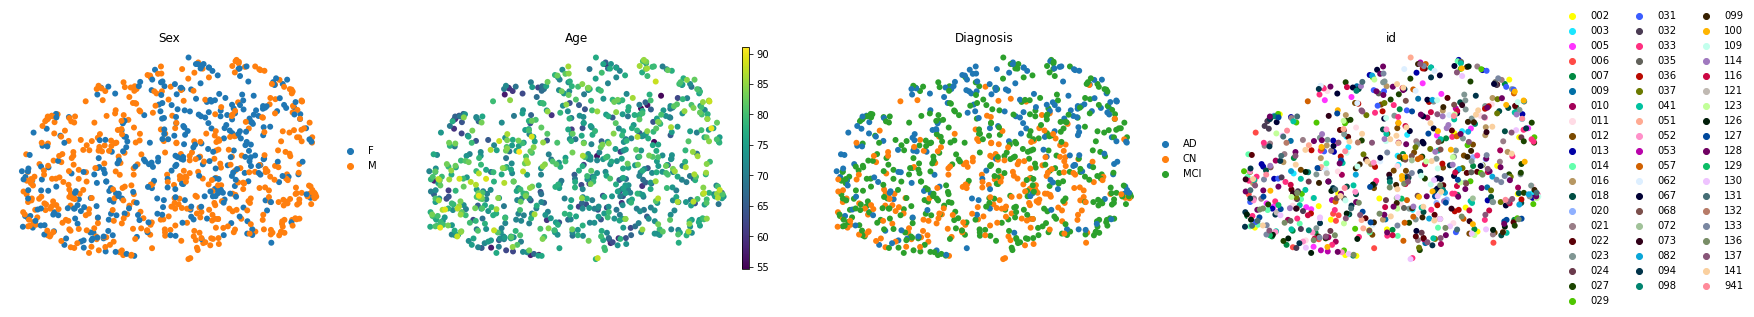

In [62]:
sc.pl.umap(
    adata,
    color = to_view,
    frameon = False,
)

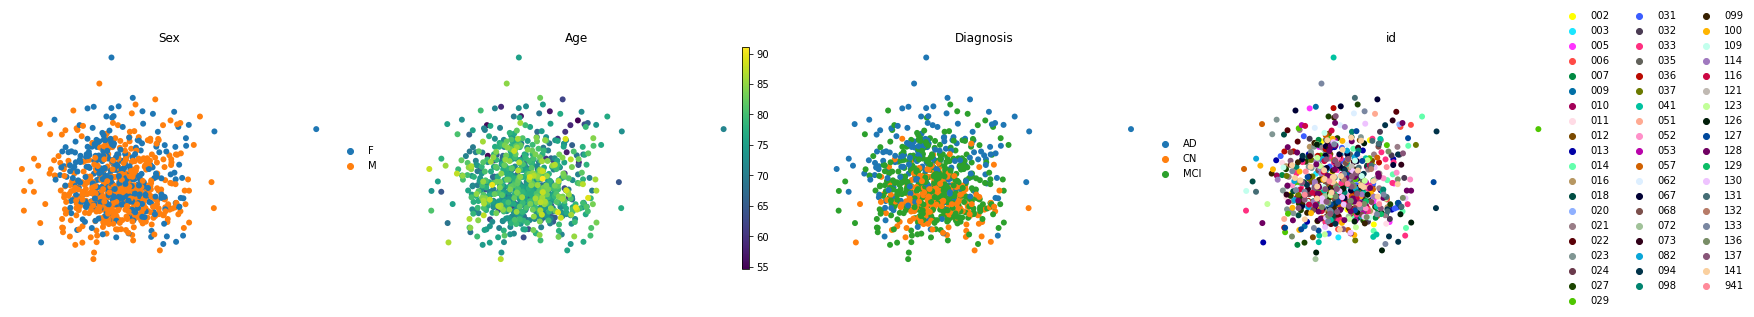

In [63]:
sc.pl.pca(adata, 
          color = to_view,
         frameon = False)

In [66]:
sc.pp.combat(adata, key = 'id')

Found 1769 genes with zero variance.


/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: invalid value encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


In [69]:
scvi.model.SCVI.setup_anndata(adata, layer = "raw", batch_key = "id", labels_key = "Diagnosis")

INFO     Using batches from adata.obs["id"]                                                  
INFO     Using labels from adata.obs["Diagnosis"]                                            
INFO     Using data from adata.layers["raw"]                                                 
INFO     Successfully registered anndata object containing 839 cells, 20484 vars, 58 batches,
         3 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [70]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [71]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 400/400: 100%|███| 400/400 [04:31<00:00,  1.47it/s, loss=2.9e+04, v_num=1]


In [72]:
model.save("/home/fengling/Documents/nnbatch/code/mod_fs")

In [73]:
adata.obsm["X_scVI"] = model.get_latent_representation()

/home/fengling/software/pkg/mamba/envs/nnbatch-env/lib/python3.9/site-packages/scvi/model/base/_base_model.py:150: UserWarning: Make sure the registered X field in anndata contains unnormalized count data.
  warnings.warn(


In [74]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.leiden(adata)
sc.tl.umap(adata)

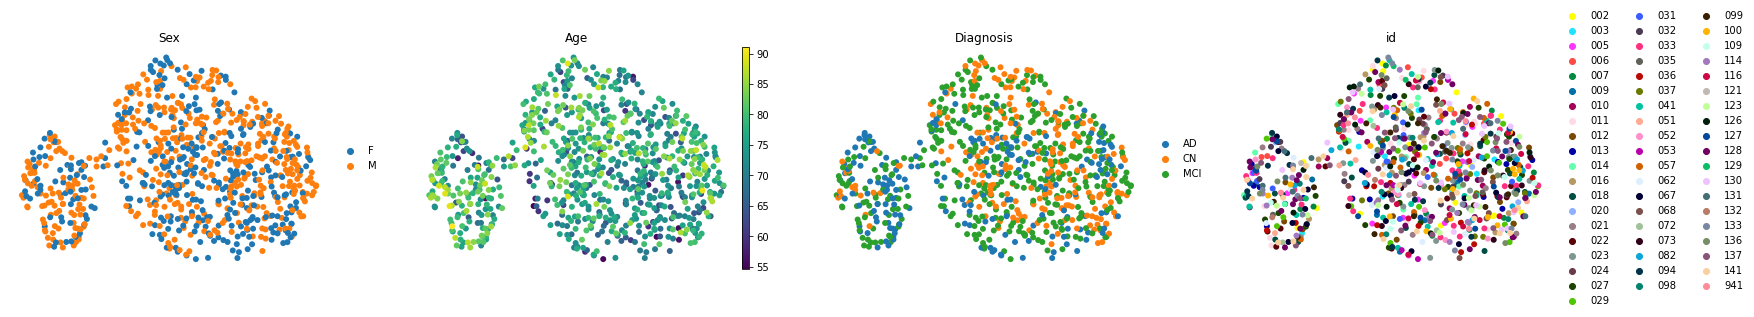

In [75]:
sc.pl.umap(
    adata,
    color = to_view,
    frameon=False)

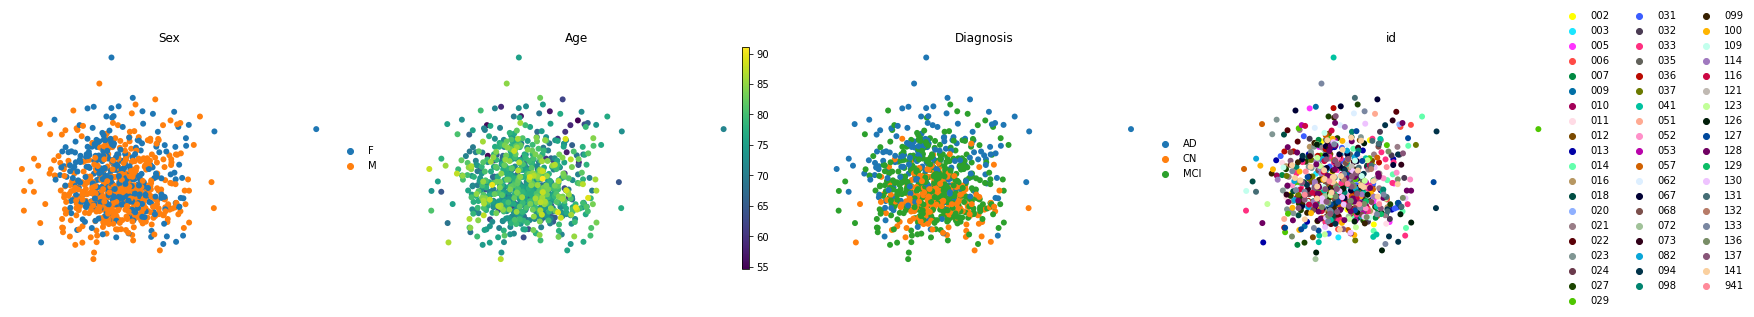

In [76]:
sc.pl.pca(adata, 
          color = to_view,
         frameon = False)